# Assignment 5

In [1]:
from enformer_pytorch import from_pretrained
import kipoiseq
from kipoiseq import Interval
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfaidx
import torch
import torch.nn as nn
import seaborn as sns
import tqdm
from transformers import GPT2Model, GPT2Tokenizer
import logomaker
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

/Users/mnguyen/miniforge3/envs/asn4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Question 1: Self-attention
Self-attention allows a model to weigh the importance of different tokens in a sequence relative to each other. This allows it to capture dependencies across the entire input, so the model can learn both local and long-range relationships. In this question, you will take a look at how self-attention works for natural language by using GPT-2 and visualizing the attention weights as a heatmap. 

### Question 1a - Self-attention in GPT-2
We will now look at how the attention weights change as we go deeper into the attention network. GPT-2 comprises of a 12-layer decoder. We will visualize what the attention weights look like for the input sentence "The quick brown fox jumps over the lazy dog." by visualizing it as a heatmap where the x-axis are all the key tokens of the sentence, and the y-axis are all query tokens of the sentence. You will visualize the first layer (0th layer), an intermediate layer (2nd layer), a middle layer (6th layer) and a deep layer (11th layer); we will use 0-indexing. Stick with only visualizing the 0th head. You will see a special `Ġ` character, which is just a special character to represent spaces. 

In [ ]:
# Load pre-trained model and tokenizer
model = GPT2Model.from_pretrained("gpt2", output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Input sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the input sentence
inputs = tokenizer(sentence, return_tensors="pt")

# Forward pass through the model
outputs = model(**inputs)

# Extract attention from the model output
attentions = outputs.attentions  # list of attention weights for each layer

# Attention for each layer is of size [1, 12, n, n] where:
# 1 is the batch size
# 12 is the number of heads
# n is the number of tokens in the input sentence

# Visualize the attention weights as a heatmap
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# TODO: Code for heatmaps

### Question 1b - Discussion
As you analyze the heatmaps from different layers, what changes do you observe in the patterns going from shallow to deeper layers. How might these changes reflect the model's understanding of the sentence structure and meaning? 

-insert written answer here-

### Question 1c - Changing the sentence structure
Now, we will do the same analysis (same layers) on the passive version of the sentence: "The lazy dog was jumped over by the quick brown fox." Repeat Question 1a with this new sentence. 

In [ ]:
sentence = "The lazy dog was jumped over by the quick brown fox."

# TODO: Code to extract attention weights and plot heatmaps

### Question 1d - Discussion 
Compare the attention heatmaps of the active and passive versions of the sentence. How do the attention patterns differ? Look in particular at the subject, verb and object of the sentence. 

-insert written answer here-

## Question 2 - One-Hot Encoding
One-hot encoding is a common method for representing DNA sequences in a format that machine learning models can process. In this question, you will implement one-hot encoding. 

### Question 2a: Implementation
Complete the function to one-hot encode the given DNA sequence. The one-hot encoding should be in alphabetical order. 

In [ ]:
def one_hot_encode_dna(sequence):
    # TODO: code for one-hot encoding DNA sequence
    
    return one_hot_encoded

# Example DNA sequence
dna_sequence = 'TCTCCAGTGCCCAAGACCACGGGCGCTCGGCGCCTTGGCTAATCCCCGTACATGTTGTTATAAATAATCAGTAGAAAGTCTGTGTTAGAGGGTGGAGTGA'

# One-hot encode the sequence
one_hot_encoded_dna = one_hot_encode_dna(dna_sequence)

### Question 2b: Plot
Make a plot to visualize the one-hot encoding. The y-axis will be the four nucleotides, and the x-axis will be each position of the DNA sequence. 

In [ ]:
# TODO: Code for visualization

### Question 2c: Discussion
What are some advantages and limitations of using one-hot encoding in neural networks? 

-insert written answer here-

## Question 3: Motif Classification
### Question 3a: One-Hot Encoding and PCA
In this question, you will classify transcription factor sequence motifs from the [JASPAR database](https://jaspar.elixir.no/). We provide two files: `training.txt` which contains 2500 training examples (500 examples from 5 different transcription factors) and `validation.txt` which contains 500 examples from these 5 TFs that can be used for validating your model. Using your function from Question 2, convert the sequences into numerical data by using one-hot encoding to represent the DNA sequences as binary vectors. The encoded sequences can then be used for PCA. Plot the first 2 components of the training data (`training.txt`) and color the points by their label (transcription factor). 

In [ ]:
# Load training data
training_txt = pd.read_csv('training.txt', sep='\t', header=None)

In [ ]:
dna_sequences = training_txt[[0]].values.flatten()

In [ ]:
# TODO: Perform one-hot encoding (Hint: make sure to make it a numpy array)

In [ ]:
# Flatten the one-hot encoded data
flattened_data = one_hot_encoded_sequences.reshape(one_hot_encoded_sequences.shape[0], -1)

In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(flattened_data)

In [ ]:
# TODO: Code for PCA and visualization

### Question 3b: Convolutional Neural Network
Implement a simple convolutional neural network using PyTorch. You can refer to the neural network we provided in Assignment 4 as a template for a CNN model class as well as the code for the training procedure. In a few sentences, describe your model architecture you decided to use and why. Plot the training loss per epoch. For a simple PyTorch tutorial based on image data, you can refer to [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

In [ ]:
label_encoder = LabelEncoder()
y_train = torch.tensor(label_encoder.fit_transform(training_txt[[1]].values.ravel()))

In [ ]:
one_hot_encoded_sequences_reshaped = one_hot_encoded_sequences.transpose(0, 2, 1)
X_train = torch.tensor(one_hot_encoded_sequences_reshaped , dtype=torch.float32)

In [ ]:
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

In [ ]:
# TODO: Code for defining a CNN class

In [ ]:
# TODO: Code for training CNN

In [ ]:
# TODO: Code for plotting loss over epochs

-insert written answer here-

### Question 3c - Evaluation
Now use the labeled data in `validation.txt` to evaluate the accuracy of your model. Use `classification_report` to show the accuracy for each TF. Make sure to comment on the accuracy for each transcription factor separately. Also comment on why certain transcription factors are harder than others (Hint: How do the hardest ones appear in the PCA plot). 

In [ ]:
# Load validation data
val_txt = pd.read_csv('validation.txt', sep='\t', header=None)

In [ ]:
# TODO: Code for processing validation data

In [ ]:
# TODO: Code for predicting TFs

In [ ]:
# TODO: Code for evaluating accuracy 

-insert written answer here-

## Question 4: Enformer
Enformer is an attention network developed by DeepMind to predict gene expression from DNA sequences. It is built on the Transformer architecture which allows it to capture the effects of regulatory elements that are located far away from the location of genes they regulate. You can learn more about Enformer from the [original publication](https://www.nature.com/articles/s41592-021-01252-x). We will use the pre-trained Enformer model to explore the inner workings of a Transformer. The input to the Enformer model is a one-hot encoded DNA sequence.

In [3]:
# Class for extracting DNA sequences from a FASTA file
class FastaStringExtractor:
    def __init__(self, fasta_file):
        self.fasta = pyfaidx.Fasta(fasta_file)
        self._chromosome_sizes = {k: len(v) for k, v in self.fasta.items()}

    def extract(self, interval: Interval, **kwargs) -> str:
        # Truncate interval if it extends beyond the chromosome lengths.
        chromosome_length = self._chromosome_sizes[interval.chrom]
        trimmed_interval = Interval(interval.chrom,
                                    max(interval.start, 0),
                                    min(interval.end, chromosome_length),
                                    )
        # pyfaidx wants a 1-based interval
        sequence = str(self.fasta.get_seq(trimmed_interval.chrom,
                                          trimmed_interval.start + 1,
                                          trimmed_interval.stop).seq).upper()
        # Fill truncated values with N's.
        pad_upstream = 'N' * max(-interval.start, 0)
        pad_downstream = 'N' * max(interval.end - chromosome_length, 0)
        return pad_upstream + sequence + pad_downstream

    def close(self):
        return self.fasta.close()

# Function to one-hot encode DNA sequences
def one_hot_encode(sequence):
  return kipoiseq.transforms.functional.one_hot_dna(sequence).astype(np.float32)

We will also load up a metadata dataframe that contains the names of each Enformer track

In [4]:
metadata_df = pd.read_csv('targets.txt', sep='\t')

### Question 4a - Prediction of gene expression
We will now investigate the output predictions of Enformer. The structure of the output for Enformer is as follows: there are 200 columns, corresponding to 200 120-bp window along the genome interval, with the value being the activity for each window; there are also 5313 rows, corresponding to 5313 different tracks that are predicted by Enformer. Each track refers to a different type of functional genomic feature or signal, such as DNase-seq, ChIP-seq, and ATAC-seq. 

You will run Enformer on an interval of chromosome 11, and obtain the predicted tracks. For that interval, plot and label:
1. the track with the highest **mean** activity
2. the track with the lowest **mean** activity
3. the track with the highest **peak** activity

We have provided you the function to plot the track, as well as an example visualization of a random track.

In [5]:
# Function to plot the predictions of Enformer
def plot_tracks(y, title, interval, height=1.5):
    fig, ax = plt.subplots(1, 1, figsize=(20, height), sharex=True)
    ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
    ax.set_title(title)
    sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()

In [6]:
# Load pre-trained Enformer model
enformer = from_pretrained('EleutherAI/enformer-official-rough', use_tf_gamma=False)

In [7]:
enformer.to(device)

Enformer(
  (stem): Sequential(
    (0): Conv1d(4, 768, kernel_size=(15,), stride=(1,), padding=(7,))
    (1): Residual(
      (fn): Sequential(
        (0): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): GELU()
        (2): Conv1d(768, 768, kernel_size=(1,), stride=(1,))
      )
    )
    (2): AttentionPool(
      (pool_fn): Rearrange('b d (n p) -> b d n p', p=2)
      (to_attn_logits): Conv2d(768, 768, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (conv_tower): Sequential(
    (0): Sequential(
      (0): Sequential(
        (0): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): GELU()
        (2): Conv1d(768, 768, kernel_size=(5,), stride=(1,), padding=(2,))
      )
      (1): Residual(
        (fn): Sequential(
          (0): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): GELU()
          (2): Conv1d(768, 768, kernel_size=(1,), stri

In [8]:
# Extract DNA sequence of chromosome 11
fasta_extractor = FastaStringExtractor('chr11.fa')

In [9]:
SEQUENCE_LENGTH = 25_600

In [10]:
# Make predictions on a defined interval of chromosome 11
mid = 35_140_086
target_interval = kipoiseq.Interval('chr11', mid-SEQUENCE_LENGTH//2, mid+SEQUENCE_LENGTH//2)

# One-hot encode DNA and make it into a tensor
sequence_tensor = torch.from_numpy(one_hot_encode(fasta_extractor.extract(target_interval.resize(SEQUENCE_LENGTH)))).to(device)

In [11]:
# Obtain predictions from Enformer and convert to a numpy array
predictions = enformer(sequence_tensor, target_length=SEQUENCE_LENGTH//128)['human']
np_predictions = predictions.detach().cpu().numpy()

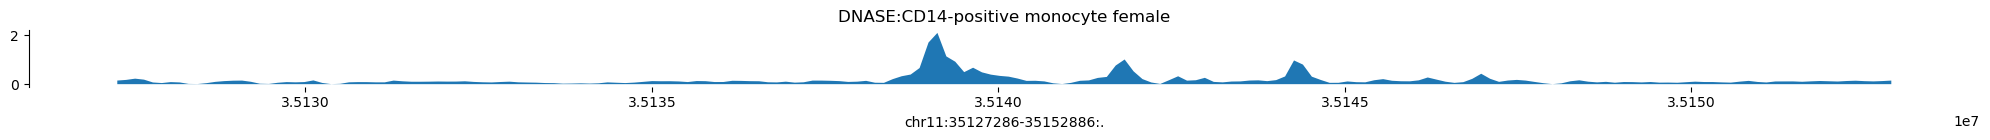

In [12]:
# Plot a random track as an example (track #41)
plot_tracks(np_predictions[:, 41], metadata_df.loc[41].description, target_interval)

#### Highest mean activity

In [ ]:
# TODO: Code for getting track with highest mean activity

#### Lowest mean activity

In [ ]:
# TODO: Code for getting track with lowest mean activity

#### Highest peak activity

In [ ]:
# TODO: Code for getting track with highest peak activity

### Question 4b - Convolution Analysis
We will now dive deeper into the convolutional layers of Enformer to determine what it is exactly doing. In Enformer, each convolutional filter in the first convolutional layer represents a generalization of a DNA motif. However, they are not exact motifs, and account for base variations at each position. We will generate motif plots for specific filters, where the signal of each nucleotide at each position can be observed. First, we will plot the first filter. Comment on how to interpret the plot, and give the most likely motif from the first filter. 

In [13]:
# Function to plot a motif of a filter
def logo_plot(filter, idx, base_title="Enformer stem convolution 1 filter"):
    filter_df = pd.DataFrame(filter).astype(float)
    filter_df.columns = ["A","C","G","T"]
    plt.figure()
    logo = logomaker.Logo(filter_df)
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left', 'bottom'], visible=True)
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)
    logo.ax.set_title(f"{base_title} {idx}")
    logo.ax.xaxis.set_ticks_position('none')
    logo.ax.xaxis.set_tick_params(pad=-1)
    plt.show()

In [14]:
n_filters, n_channels, n_positions = enformer.stem[0].weight.shape
conv_weights = enformer.stem[0].weight.detach().cpu().numpy().copy()

<Figure size 640x480 with 0 Axes>

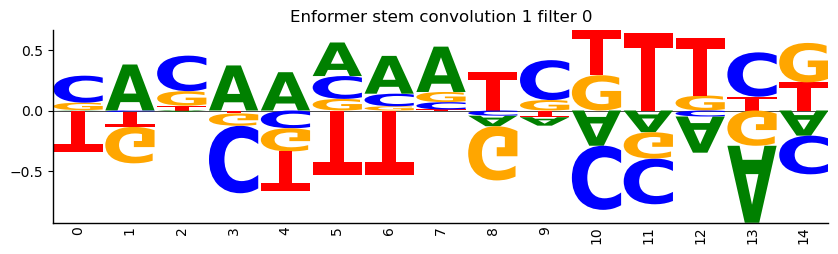

In [15]:
interest_filter = 0
interest_weights = conv_weights[interest_filter,:,:].T
logo_plot(interest_weights, interest_filter)

-insert written answer here-

### Question 4c - Find motif with the strongest signal 
Now, you must find the motif with the strongest signal. (Hint: you will want to look at absolute signal values). Use the plot and extract the motif with the strongest signal. Use [Tomtom](https://meme-suite.org/meme/tools/tomtom) to search the motif sequence. The top hit should contain a link for more information. What is the name of this motif? 

In [ ]:
# TODO: Code for finding motif with the strongest signal

### Question 4d - Finding most closely related filter to a motif
You will use a MYOD1 motif from Question 2, and find out which Enformer filter would likely represent that motif. Visualize the motif using the same plot as before. Comment on how similar the MYOD1 motif sequence is to the motif in Enformer.  

In [ ]:
sequence = 'GCGCAGCTGTCCTGA'

In [ ]:
# TODO: Code for finding the most closely related filter

-insert written answer here-